In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

## MODEL 

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=128, activation = 'relu'))
model.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 806us/step - loss: 0.4714 - accuracy: 0.8686
Epoch 2/20
1875/1875 [==============================] - 1s 773us/step - loss: 0.1128 - accuracy: 0.9655
Epoch 3/20
1875/1875 [==============================] - 2s 806us/step - loss: 0.0736 - accuracy: 0.9769
Epoch 4/20
1875/1875 [==============================] - 1s 788us/step - loss: 0.0508 - accuracy: 0.9842
Epoch 5/20
1875/1875 [==============================] - 1s 775us/step - loss: 0.0396 - accuracy: 0.9868
Epoch 6/20
1875/1875 [==============================] - 1s 778us/step - loss: 0.0321 - accuracy: 0.9901
Epoch 7/20
1875/1875 [==============================] - 1s 773us/step - loss: 0.0246 - accuracy: 0.9919
Epoch 8/20
1875/1875 [==============================] - 1s 773us/step - loss: 0.0211 - accuracy: 0.9930
Epoch 9/20
1875/1875 [==============================] - 1s 773us/step - loss: 0.0150 - accuracy: 0.9952
Epoch 10/20
1875/1875 [==============================] - 1s 775u

In [7]:
accuracy, loss = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 0s 572us/step - loss: 0.1341 - accuracy: 0.9759
0.13412486016750336
0.9758999943733215


In [35]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model/assets


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


The result is : 3


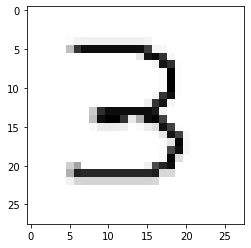

In [25]:
for x in range(3, 4):
    img = cv.imread(f"{x}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"The result is : {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)